In [5]:
# 모듈 로딩
import torch 
import torch.nn as nn  
import torch.nn.functional as F  
from torchinfo import summary
import cv2

from PIL import Image

from torchvision import transforms
from torchvision.transforms import v2
import torchvision

import pandas as pd
import os 

import matplotlib.pyplot as plt 

In [6]:
# 저장 경로
SAVE_PATH = '../KKM_models/'

SAVE_MODEL = SAVE_PATH + 'model_num_loss(31.4862_score(177.2816))'

In [7]:
fruitModel = torch.load(SAVE_MODEL, weights_only=False, map_location=torch.device('cpu'))

In [8]:
summary(fruitModel)

Layer (type:depth-idx)                   Param #
Inception3                               --
├─BasicConv2d: 1-1                       --
│    └─Conv2d: 2-1                       (864)
│    └─BatchNorm2d: 2-2                  (64)
├─BasicConv2d: 1-2                       --
│    └─Conv2d: 2-3                       (9,216)
│    └─BatchNorm2d: 2-4                  (64)
├─BasicConv2d: 1-3                       --
│    └─Conv2d: 2-5                       (18,432)
│    └─BatchNorm2d: 2-6                  (128)
├─MaxPool2d: 1-4                         --
├─BasicConv2d: 1-5                       --
│    └─Conv2d: 2-7                       (5,120)
│    └─BatchNorm2d: 2-8                  (160)
├─BasicConv2d: 1-6                       --
│    └─Conv2d: 2-9                       (138,240)
│    └─BatchNorm2d: 2-10                 (384)
├─MaxPool2d: 1-7                         --
├─InceptionA: 1-8                        --
│    └─BasicConv2d: 2-11                 --
│    │    └─Conv2d: 3-1         

In [9]:
transform = v2.Compose(
    [
        v2.Resize(size=(342,342)),
        v2.ToTensor()
        # v2.ToDtype(torch.float32, scale=True),
       # v2.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    ]
)

c:\Users\KDP19\anaconda3\envs\TORCH_CV_38\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [10]:
targets = ['Apple','Banana','Orange','Strawberry']

In [11]:
img1 = r'C:\EX_PY06\6_TORCH_IMAGE\WORK\images\027.오렌지.png'
img2 = r'C:\EX_PY06\6_TORCH_IMAGE\WORK\images\Altın_Portakal.jpg'

In [12]:
image1 = Image.open(img1)
image2 = Image.open(img2)

In [13]:
pil_image1 = transform(image1).unsqueeze(0)
pil_image2 = transform(image2).unsqueeze(0)

In [14]:
print(pil_image1.shape)
pil_image2.shape

torch.Size([1, 4, 342, 342])


torch.Size([1, 3, 342, 342])

In [15]:
# 모델 테스트
fruitModel.eval()
result = fruitModel(pil_image2)
result2 = fruitModel(pil_image1)

In [16]:
print(result)
result2

tensor([[-2.2504, -2.6453,  1.2991, -1.4006]], grad_fn=<AddmmBackward0>)


tensor([[-1.7418, -3.3511,  1.3818, -1.5105]], grad_fn=<AddmmBackward0>)

In [17]:
idx = result.argmax().item()
idx
idx1 = result2.argmax().item()
idx1

2

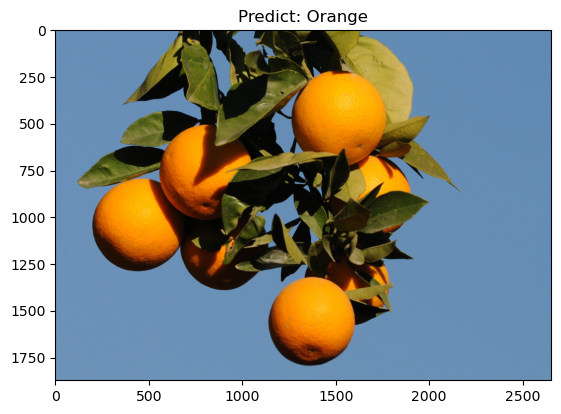

In [18]:
plt.imshow(image2)
plt.title(f'Predict: {targets[idx1]}')
plt.show()